In [1]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import gzip
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, test_set = pickle.load(f, encoding='latin1')
f.close()

In [3]:
x_train, y_train = train_set
x_test, y_test = test_set

In [4]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test  shape: ",x_test.shape)
print("y_test  shape: ",y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test  shape:  (10000, 28, 28)
y_test  shape:  (10000,)


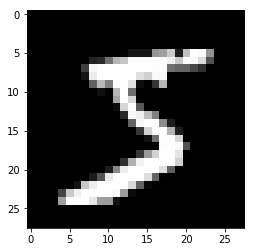

In [5]:
plt.imshow(x_train[0].reshape((28, 28)), cmap=cm.Greys_r)
plt.show()

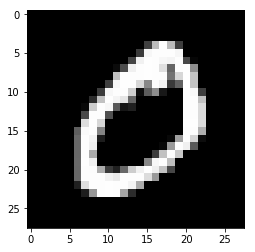

In [6]:
plt.imshow(x_train[1].reshape((28, 28)), cmap=cm.Greys_r)
plt.show()

In [7]:
# building the input vector from the 28x28 pixels
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data to help with the training
x_train /= 255
x_test /= 255

In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# compiling the sequential model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# training the model and saving metrics in history
history = model.fit(x_train, y_train,
          batch_size=64, epochs=25,
          verbose=2,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 12s - loss: 0.2232 - acc: 0.9335 - val_loss: 0.1072 - val_acc: 0.9651
Epoch 2/25
 - 11s - loss: 0.0984 - acc: 0.9693 - val_loss: 0.0845 - val_acc: 0.9722
Epoch 3/25
 - 11s - loss: 0.0742 - acc: 0.9764 - val_loss: 0.0722 - val_acc: 0.9776
Epoch 4/25
 - 11s - loss: 0.0591 - acc: 0.9811 - val_loss: 0.0690 - val_acc: 0.9797
Epoch 5/25
 - 10s - loss: 0.0521 - acc: 0.9835 - val_loss: 0.0732 - val_acc: 0.9773
Epoch 6/25
 - 11s - loss: 0.0440 - acc: 0.9855 - val_loss: 0.0652 - val_acc: 0.9814
Epoch 7/25
 - 11s - loss: 0.0411 - acc: 0.9868 - val_loss: 0.0657 - val_acc: 0.9822
Epoch 8/25
 - 11s - loss: 0.0336 - acc: 0.9888 - val_loss: 0.0756 - val_acc: 0.9789
Epoch 9/25
 - 11s - loss: 0.0327 - acc: 0.9895 - val_loss: 0.0985 - val_acc: 0.9761
Epoch 10/25
 - 11s - loss: 0.0323 - acc: 0.9895 - val_loss: 0.0608 - val_acc: 0.9835
Epoch 11/25
 - 11s - loss: 0.0266 - acc: 0.9915 - val_loss: 0

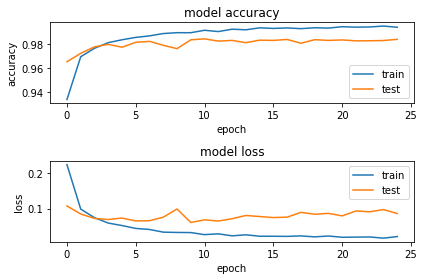

In [21]:
# saving the model weights
model.save_weights("my_model_weights.h5")
# saving the model architecture
# save as JSON
json_string = model.to_json()


# plotting the metrics
# subplot(nrows, ncols, plot_number)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [26]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.0858989994680855
Test Accuracy 0.9839


In [30]:
import numpy as np


0  classified correctly
1  classified incorrectly


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


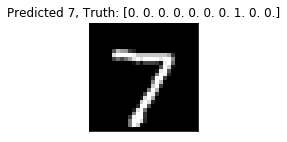

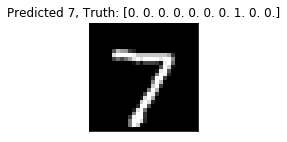

In [31]:
predicted_classes = model.predict_classes(x_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation